In [50]:
using ArchGDAL, Rasters, Plots, Statistics, Shapefile, DataFrames, Dates, GeoInterface



using CSV


using NighttimeLights




using GADM


┌ Warning: Module ArchGDAL with build ID ffffffff-ffff-ffff-0005-0246fa1a2964 is missing from the cache.
│ This may mean ArchGDAL [c9ce4bd3-c3d5-55b8-8973-c0e20141b8c3] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:2541


In [ ]:
#Bounding Box

path = "/Users/dmitrysytin/Desktop/Economics Stanford/Australia 2/"
filelist = readdir(path)
dates = collect(Date(2022,12):Month(1):Date(2022, 12))



#bounds = X(Rasters.Between(140.36, 154.43)), Y(Rasters.Between(-39.4, -20.40)) # bounding box Australia

bounds= (X(Rasters.Between(148,154)), Y(Rasters.Between(-37, -27)))# bounding box New South Wales




# Filter to include only .tif or .tiff files
tif_files = filter(f -> endswith(lowercase(f), ".tif") || endswith(lowercase(f), ".tiff"), filelist)





aod_raster_list = [Raster(joinpath(path, i), lazy = true)[bounds...] for i in tif_files]





timestamps = collect(1:length(aod_raster_list))
aod_series = RasterSeries(aod_raster_list, Ti(timestamps))
aod_datacube = Rasters.combine(aod_series, Ti)[bounds...]



#for datas in aod_raster_list
 #  min_value = quantile(vec(datas), 0.01)
 #  max_value = quantile(vec(datas), 0.99)
  # datas_new =Raster(UInt8.(clamp.(datas, min_value, max_value)))
  # deleteat!(aod_raster_list, findfirst(==(datas), aod_raster_list))
  # push!(aod_raster_list, datas_new)
#end







╭──────────────────────────╮
│ 59×100×8 Raster{UInt8,3} │
├──────────────────────────┴───────────────────────────────────────────── dims ┐
  ↓ X  Projected{Float64} LinRange{Float64}(148.00000000000003, 153.80000000000007, 59) ForwardOrdered Regular Intervals{Start},
  → Y  Projected{Float64} LinRange{Float64}(-27.100000000000005, -37.0, 100) ReverseOrdered Regular Intervals{Start},
  ↗ Ti Sampled{Int64} [1, 2, …, 7, 8] ForwardOrdered Irregular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Metadata{Rasters.GDALsource} of Dict{String, Any} with 4 entries:
  "units"    => ""
  "offset"   => 0.0
  "filepath" => "/Users/dmitrysytin/Desktop/Economics Stanford/Australia 2/MOD_…
  "scale"    => 1.0
├────────────────────────────────────────────────────────────────────── raster ┤
  extent: Extent(X = (148.00000000000003, 153.90000000000006), Y = (-37.0, -27.000000000000004), Ti = (1, 8))
  missingval: 0x00
  crs: GEOGCS["WGS 84",DATUM["WGS_1984",SPHER

┌ Warning: (Band,) dims were not found in object.
└ @ DimensionalData.Dimensions /Users/dmitrysytin/.julia/packages/DimensionalData/VxDQB/src/Dimensions/primitives.jl:777


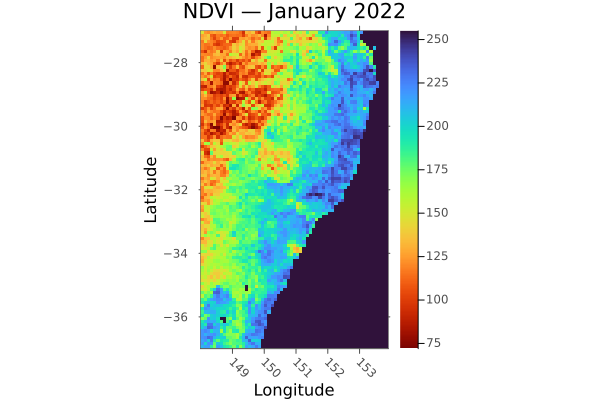

In [ ]:
#Plot results
gr()
plot(view(aod_datacube, Band(1), Ti(5)), color = cgrad(:turbo, rev=true),title = "NDVI — January 2022",
          xlabel = "Longitude",
          ylabel = "Latitude")

#view(aod_datacube, Band(1), Ti(1)) |> plot

#savefig("slice12022.png")

Any[179]
Any[179, 174]
Any[179, 174, 156]
Any[179, 174, 156, 194]
Any[179, 174, 156, 194, 198]
Any[179, 174, 156, 194, 198, 185]
Any[179, 174, 156, 194, 198, 185, 195]
Any[179, 174, 156, 194, 198, 185, 195, 189]


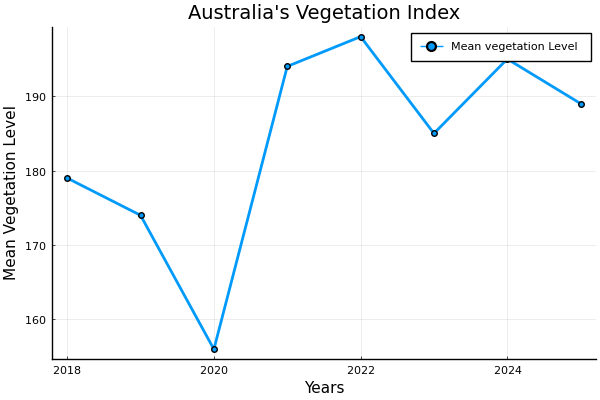

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [ ]:
#Plot graph
pyplot()
meanall = []


for datas in tif_files
    data=Raster(datas, lazy = true)[bounds...]
    meani = Statistics.mean((skipmissing(Array(data))))
    mean = Int(trunc(meani))
    push!(meanall, mean)
    println(meanall)
end


dates= [2018, 2019, 2020, 2021, 2022, 2023,2024,2025]


plot(dates, meanall,
    label = "Mean vegetation Level ",
    lw = 2,
    marker = :circle,
    xlabel = "Years",
    ylabel = "Mean Vegetation Level",
    title = "Australia's Vegetation Index")



#savefig("slice1.png")

In [ ]:
#Download data
path = "/Users/dmitrysytin/Desktop/Economics Stanford/Australia-air/"
filelist = readdir(path)
dates = collect(Date(2022,12):Month(1):Date(2022, 12))



#bounds = X(Rasters.Between(140.36, 154.43)), Y(Rasters.Between(-39.4, -20.40)) # bounding box Australia

bounds= (X(Rasters.Between(148,154)), Y(Rasters.Between(-37, -27)))

# Filter to include only .tif or .tiff files
tif_files = filter(f -> endswith(lowercase(f), ".tif") || endswith(lowercase(f), ".tiff"), filelist)





aod_raster_list = [Raster(joinpath(path, i), lazy = true)[bounds...] for i in tif_files]





timestamps = collect(1:length(aod_raster_list))
aod_series = RasterSeries(aod_raster_list, Ti(timestamps))
aod_datacube = Rasters.combine(aod_series, Ti)[bounds...]

╭──────────────────────────╮
│ 59×100×8 Raster{UInt8,3} │
├──────────────────────────┴───────────────────────────────────────────── dims ┐
  ↓ X  Projected{Float64} LinRange{Float64}(148.00000000000003, 153.80000000000007, 59) ForwardOrdered Regular Intervals{Start},
  → Y  Projected{Float64} LinRange{Float64}(-27.100000000000005, -37.0, 100) ReverseOrdered Regular Intervals{Start},
  ↗ Ti Sampled{Int64} [1, 2, …, 7, 8] ForwardOrdered Irregular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Metadata{Rasters.GDALsource} of Dict{String, Any} with 4 entries:
  "units"    => ""
  "offset"   => 0.0
  "filepath" => "/Users/dmitrysytin/Desktop/Economics Stanford/Australia-air/MO…
  "scale"    => 1.0
├────────────────────────────────────────────────────────────────────── raster ┤
  extent: Extent(X = (148.00000000000003, 153.90000000000006), Y = (-37.0, -27.000000000000004), Ti = (1, 8))
  missingval: 0x00
  crs: GEOGCS["WGS 84",DATUM["WGS_1984",SPHER

┌ Warning: (Band,) dims were not found in object.
└ @ DimensionalData.Dimensions /Users/dmitrysytin/.julia/packages/DimensionalData/VxDQB/src/Dimensions/primitives.jl:777


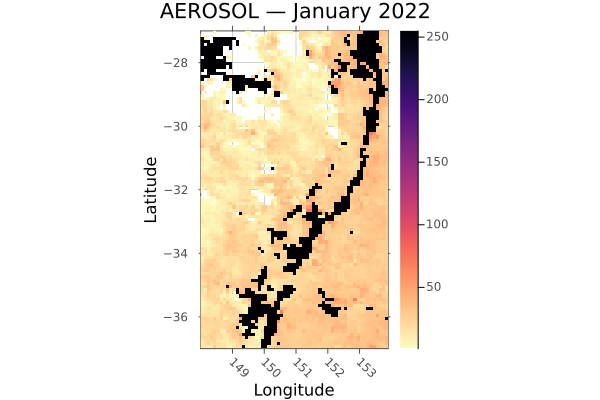

In [ ]:
#Plot results

gr()
plot(view(aod_datacube, Band(1), Ti(5)), color = cgrad(:magma, rev= true),title = "AEROSOL — January 2022",
          xlabel = "Longitude",
          ylabel = "Latitude")

#view(aod_datacube, Band(1), Ti(1)) |> plot

#savefig("sliceair2022.png")

Any[42]
Any[42, 65]
Any[42, 65, 123]
Any[42, 65, 123, 36]
Any[42, 65, 123, 36, 49]
Any[42, 65, 123, 36, 49, 27]
Any[42, 65, 123, 36, 49, 27, 36]
Any[42, 65, 123, 36, 49, 27, 36, 25]


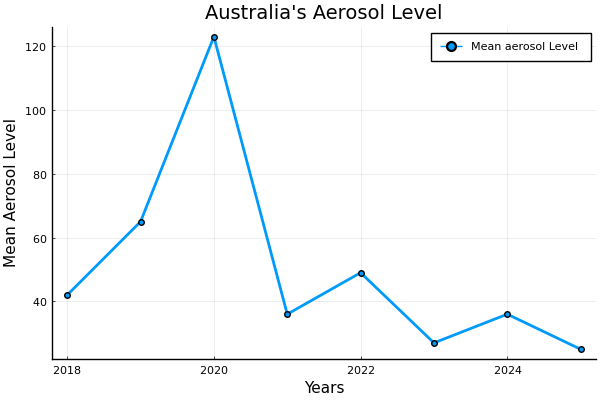

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [ ]:
#Plot graph
pyplot()
meanall = []


for datas in tif_files
    data=Raster(datas, lazy = true)[bounds...]
    meani = Statistics.mean((skipmissing(Array(data))))
    mean = Int(trunc(meani))
    push!(meanall, mean)
    println(meanall)
end


dates= [2018, 2019, 2020, 2021, 2022, 2023,2024,2025]


plot(dates, meanall,
    label = "Mean aerosol Level ",
    lw = 2,
    marker = :circle,
    xlabel = "Years",
    ylabel = "Mean Aerosol Level",
    title = "Australia's Aerosol Level")



#savefig("sliced.png")